<a href="https://colab.research.google.com/github/sarmadchandio/WebScrapper/blob/main/reddit-scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Press ctrl+shift+c to hide/show code cells. <br>
Press ```shift+enter``` to execute a code cell OR ```click run/play button``` to execute the cell.

In [1]:
# @title
!pip install praw nltk
!pip install wordcloud matplotlib
!pip install gensim
!pip install bertopic
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import praw
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Big Data Pipeline

![img](https://drive.google.com/uc?id=1I8hfMsmjKTIl76DxsA9F9tzngkhUo6dJ)


# Part1: Let's scrape some reddit data!


Annoying things that we need to setup before starting.
1. Create a Reddit account.
2. Go to [this link](https://www.reddit.com/prefs/apps)
3. Use the following image to setup things
<div>
<img src="https://drive.google.com/uc?id=1V62iD3KVlrPoyLRqbqtaRGcQRvJGh3i8"
width="700"/>
</div>

- Enter ```http://localhost:8080``` in the redirect uri
- Copy personal_use_script and paste it in the personal_use_script below. </br>
- Copy secret and paste it in the client_secret below

</br>

---



The deal with *APIs* is simple. It is annoying to setup ONCE but it easy to use over and over and over and over ... </br>
Think of an API as a waiter who takes order from you gets food from the kitchen.

---


In [3]:
# @title
personal_use_script = ''
client_secret = ''
user_agent = 'Ignore me'


reddit = praw.Reddit(client_id=personal_use_script, client_secret=client_secret, user_agent=user_agent, check_for_async=False)
print("We are done setting up the api!")

We are done setting up the api!


In [4]:
# @title
def get_reddit_posts(subreddit_name, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for submission in subreddit.hot(limit=limit):  # change to .new, .top, or .controversial if needed
      post_data = {
          "title": submission.title,
          "score": submission.score,
          "selftext": submission.selftext,
          # "id": submission.id,
          # "url": submission.url,
          "created": submission.created
          # ... any other attributes you are interested in
      }
      posts.append(post_data)

    return posts


### Try changing 'politics' to the subreddit of your liking!



In [5]:
# Get the latest 1000 posts from r/politics
posts = get_reddit_posts('politics', limit=1000)
print("Posts collected successfully!")

Posts collected successfully!


In [6]:
# @title
df_posts = pd.DataFrame(posts)
df_posts

,title,score,selftext,created
0,Saturday Morning Political Cartoon Thread,52,"It's Saturday, folks. Let's all kick back with...",1.740845e+09
1,‘This is the point you resign’: Former U.S. Na...,18186,,1.740958e+09
2,"‘As far as I’m concerned, he’s an enemy to the...",12362,,1.740960e+09
3,Sen. Bernie Sanders says calls for Zelenskyy t...,25084,,1.740953e+09
4,"‘If you just came here to yell, I can leave,’ ...",11122,,1.740955e+09
...,...,...,...,...
632,Attorney General Pam Bondi alleges FBI agents ...,38,,1.740755e+09
633,Elon Musk keeps tweeting the 'R-word.' Disabil...,6453,,1.740653e+09
634,CFPB leaders and Musk’s DOGE planned to fire n...,38,,1.740754e+09
635,Iowa gives final approval to a bill removing g...,31,,1.740754e+09


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/sample_data.csv'
df_posts.to_csv(file_path, index=False)

Mounted at /content/gdrive


# Part 2: But what do I do with so much text?

Before doing so much with big text let's try something small with just two sentences. </br>
Don't tell my peers that I showed you how simple it is!

In [8]:
import nltk

# @title
sentence1 = 'This is a Sentence. This sentence will be lowerCASED, LEMMAtized, removed OF stopwords, and tokenized'
sentence2 = 'I am another SENTENCE! I will be used to demonstrate how lemmatization, stopword removal, lowercasing, and tokenization work.'

print(sentence1)
print(sentence2)

This is a Sentence. This sentence will be lowerCASED, LEMMAtized, removed OF stopwords, and tokenized
I am another SENTENCE! I will be used to demonstrate how lemmatization, stopword removal, lowercasing, and tokenization work.


Quick question: Is 'Toxic' the same as 'toxic' or 'toXic' or 'TOXIC'?

In [9]:
# @title
sentence1 = sentence1.lower()
sentence2 = sentence2.lower()

print(sentence1)
print(sentence2)

this is a sentence. this sentence will be lowercased, lemmatized, removed of stopwords, and tokenized
i am another sentence! i will be used to demonstrate how lemmatization, stopword removal, lowercasing, and tokenization work.


quick question: Is 'stripped' the same as 'strip' or 'used' the same as 'use'?

In [10]:
# @title
sentence1 = sentence1.replace('cased', 'case').replace('lemmatized', 'lemma').replace('removed', 'remove').replace('tokenized', 'token').replace('stopwords', 'stopword').replace('lowercased', 'lowercase')
sentence2 = sentence2.replace('used', 'use').replace('lemmatization', 'lemma').replace('removal', 'remove').replace('tokenization', 'token').replace('lowercasing', 'lowercase')

print(sentence1)
print(sentence2)

this is a sentence. this sentence will be lowercase, lemma, remove of stopword, and token
i am another sentence! i will be use to demonstrate how lemma, stopword remove, lowercase, and token work.


A computer can't really make sense of sentences (atleast not before I tell you it does). So let's help break the sentences into words, called tokens.

In [11]:
# @title
tokens1 = nltk.word_tokenize(sentence1)
tokens2 = nltk.word_tokenize(sentence2)

print(tokens1)
print(tokens2)

['this', 'is', 'a', 'sentence', '.', 'this', 'sentence', 'will', 'be', 'lowercase', ',', 'lemma', ',', 'remove', 'of', 'stopword', ',', 'and', 'token']
['i', 'am', 'another', 'sentence', '!', 'i', 'will', 'be', 'use', 'to', 'demonstrate', 'how', 'lemma', ',', 'stopword', 'remove', ',', 'lowercase', ',', 'and', 'token', 'work', '.']


In [12]:
tokens1 = [t for t in tokens1 if t.isalpha()]
tokens2 = [t for t in tokens2 if t.isalpha()]

print(tokens1)
print(tokens2)

['this', 'is', 'a', 'sentence', 'this', 'sentence', 'will', 'be', 'lowercase', 'lemma', 'remove', 'of', 'stopword', 'and', 'token']
['i', 'am', 'another', 'sentence', 'i', 'will', 'be', 'use', 'to', 'demonstrate', 'how', 'lemma', 'stopword', 'remove', 'lowercase', 'and', 'token', 'work']


thinking time: Are all words equally important to determine what is being talked about? Can we still determine the topic of a sentence if we remove some words?

In [13]:
# @title
# remove all the stop words
stop_words = ['i', 'is', 'am', 'are', 'will', 'and', 'be', 'a', 'to', 'of', 'how', 'this']
tokens1 = [t for t in tokens1 if t not in stop_words]
tokens2 = [t for t in tokens2 if t not in stop_words]

print(tokens1)
print(tokens2)

['sentence', 'sentence', 'lowercase', 'lemma', 'remove', 'stopword', 'token']
['another', 'sentence', 'use', 'demonstrate', 'lemma', 'stopword', 'remove', 'lowercase', 'token', 'work']


Different techniques compare these lists to compare similarity between any two documents. Let's apply these techniques to our collected data!

### cleaning our dataset

In [14]:
# @title
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from gensim import corpora
from gensim.models import LdaModel


stopwords = set(ENGLISH_STOP_WORDS)
words_we_want_to_remove = ['word1', 'word2', 'removeme']
stopwords.update(words_we_want_to_remove)

def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords])  # Remove stopwords
    return text

# Assuming df_posts is your DataFrame and 'selftext' is the column with text data
texts = df_posts['title'] + '. ' + df_posts['selftext']

# Apply preprocessing to each document
processed_texts = [preprocess(text) for text in texts]

# Tokenize the documents
tokenized_texts = [text.split() for text in processed_texts]

# Create a Gensim dictionary and corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

print("Our code is cleaned")

Our code is cleaned


In [15]:
# This is how the entries look like after cleaning.
for doc_token in tokenized_texts[:10]:
  print(doc_token)

['saturday', 'morning', 'political', 'cartoon', 'thread', 'saturday', 'folks', 'lets', 'kick', 'cup', 'coffee', 'share', 'cartoons', 'feel', 'free', 'share', 'political', 'cartoons', 'thread', 'usual', 'civility', 'policy', 'rules', 'follow', '1', 'toplevel', 'comment', 'contain', 'political', 'cartoon', 'means', 'textonly', 'toplevel', 'comments', '2', 'original', 'cartoon', 'means', 'photographs', 'edited', 'cartoons', 'ai', 'generated', 'images', 'templates', 'memes', 'image', 'macros', 'oc', 'allowed', 'animation', '3', 'toplevel', 'comment', 'maximum', '3', 'cartoons', 'thats', 'enjoy', 'weekend']
['point', 'resign', 'national', 'security', 'advisor', 'calls', 'marco', 'rubio', 'resign']
['far', 'im', 'concerned', 'hes', 'enemy', 'united', 'states', 'rep', 'crockett', 'lays', 'trump']
['sen', 'bernie', 'sanders', 'says', 'calls', 'zelenskyy', 'resign', 'horrific']
['just', 'came', 'yell', 'leave', 'trumpsupporting', 'oregon', 'congressman', 'tells', 'crowd', 'angry', 'rural', 'vot


# Part 3: Can I see some graphs?
Extracting topics!
Try changing the number of topics and passes to see how the results change.

In [16]:
# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=20)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.015*"trump" + 0.010*"elon" + 0.008*"says" + 0.008*"musk" + 0.006*"social"')
(1, '0.021*"trump" + 0.010*"trumps" + 0.009*"federal" + 0.009*"zelensky" + 0.005*"state"')
(2, '0.042*"trump" + 0.014*"oval" + 0.014*"office" + 0.012*"zelenskyy" + 0.009*"trumps"')


### We have a list of extracted topics from our own collected data!
Wait... why do they all look the same and why is trymp in most of them? Maybe my model was dumb! Or it wasn't context aware (try and recall the paper you read last week). Language context matters! <br>

**λ = 1.0** displays words that frequently appear in the topic, even if they are common across multiple topics. Whereas **λ = 0.0** highlights words that are most unique to each topic, filtering out common words.

Salient terms **uniquely** identifies a topic. They are less likely to occur across multiple topics.

Relevant terms are terms that occur **frequently** within a topic. They are not necessarily unique to the topic.


In [17]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare interactive visualization
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Show interactive visualization
lda_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.054087  0.094412       1        1  23.080845
1     -0.062673 -0.089894       2        1  37.416780
2      0.116761 -0.004518       3        1  39.502375, topic_info=            Term       Freq      Total Category  logprob  loglift
104         oval  32.000000  32.000000  Default  30.0000  30.0000
103       office  34.000000  34.000000  Default  29.0000  29.0000
69     zelenskyy  31.000000  31.000000  Default  28.0000  28.0000
137         elon  22.000000  22.000000  Default  27.0000  27.0000
472      federal  22.000000  22.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
306   government   5.859509   8.591169   Topic3  -5.9608   0.5461
1110     threats   6.057115   9.725994   Topic3  -5.9276   0.4552
614         deal   6.370435  12.330055   Topic3  -5.8772   0.2684
449        world   6.522792  13.781785   Topic3  -5.8535   0.1808
480       europe   5.790566  10.757066   Topic3  -5.9726   0.3095

[195 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
82        1  0.183765  administration
82        2  0.245019  administration
82        3  0.551294  administration
620       2  0.921611          agency
400       2  0.153302          ambush
...     ...       ...             ...
347       3  0.485896        zelensky
1444      1  0.920552   zelenskytrump
69        1  0.064366       zelenskyy
69        2  0.032183       zelenskyy
69        3  0.901125       zelenskyy

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

## Lets try context-aware models to do the same thing and see what topics we get.
ahmmm wait. But what does context even mean? </br>

The following sentences will have the same tokens. \[lets, eat, grandpa\] but the meaning is different. </br>

 - 'let's eat grandpa'
 - 'grandpa let's eat'

</br>

The new machine learning models can somehow capture this! Let's put them to test.

In [18]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Create an instance of BERTopic
topic_model = BERTopic(min_topic_size=4, nr_topics=20)
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(texts, show_progress_bar=True)

# Fit the model on your data to retrieve topics
topics = topic_model.fit_transform(texts, embeddings=embeddings)

/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Show me the top 7 topics that you have collected and top 3 words that contribute the most in making up the topic

In [19]:
topic_model.visualize_barchart(top_n_topics=4, n_words=10, width=450, height=400)

How far away the topics are from each other.

In [20]:
topic_model.visualize_topics(top_n_topics=15)

In [21]:
topic_model.visualize_documents(texts, embeddings=embeddings)

## Everybody loves word clouds!

Let's see which words occur the most in our collected data.

In [22]:
# join all the posts to make one large paragraph
text_data = ' '.join(texts)
processed_text = ' '.join(processed_texts)

def generate_word_cloud(text):

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()

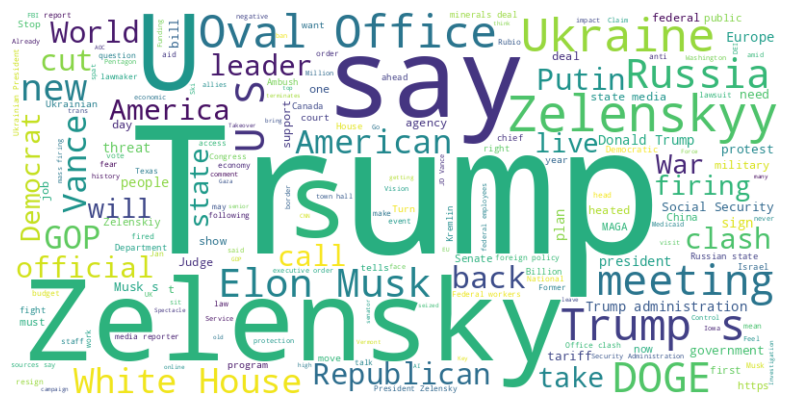

In [23]:
generate_word_cloud(text_data)

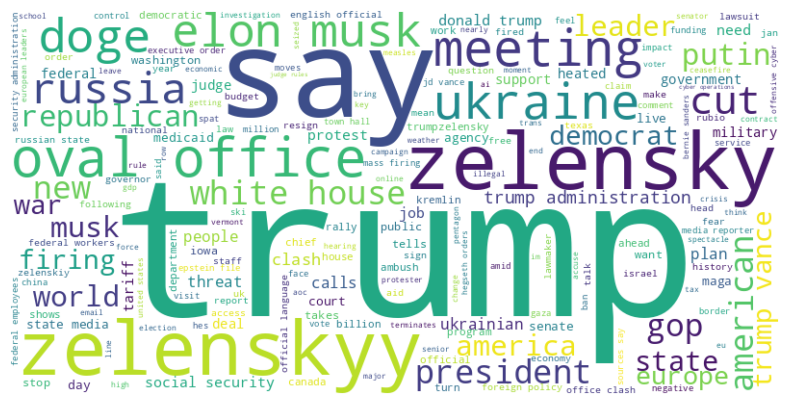

In [24]:
generate_word_cloud(processed_text)

## What about sentiment analysis?
Let's calculate the sentiments and see some example posts 🙂

In [25]:
# @title
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def calculate_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)['compound']
    return sentiment

# Calculate sentiment
df_posts['sentiment'] = (df_posts['title']+df_posts['selftext']).apply(calculate_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
# @title
df_posts['sentiment_label'] = pd.cut(
    df_posts['sentiment'],
    bins=[-1, -0.3, 0.3, 1],
    labels=['negative', 'neutral', 'positive']
)

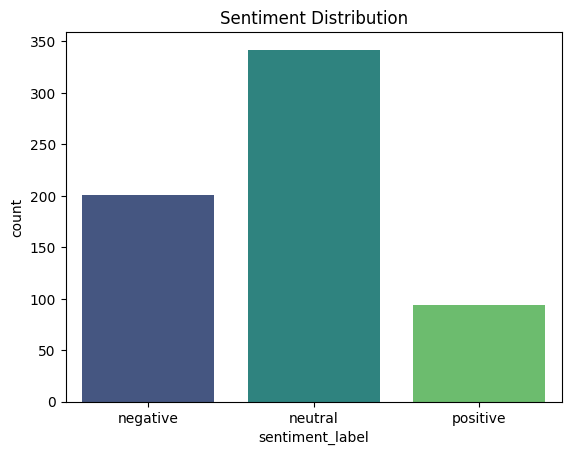

In [27]:
sns.countplot(x='sentiment_label', data=df_posts, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [28]:
df_posts

,title,score,selftext,created,sentiment,sentiment_label
0,Saturday Morning Political Cartoon Thread,52,"It's Saturday, folks. Let's all kick back with...",1.740845e+09,-0.1984,neutral
1,‘This is the point you resign’: Former U.S. Na...,18186,,1.740958e+09,0.0000,neutral
2,"‘As far as I’m concerned, he’s an enemy to the...",12362,,1.740960e+09,-0.1779,neutral
3,Sen. Bernie Sanders says calls for Zelenskyy t...,25084,,1.740953e+09,-0.3400,negative
4,"‘If you just came here to yell, I can leave,’ ...",11122,,1.740955e+09,-0.5106,negative
...,...,...,...,...,...,...
632,Attorney General Pam Bondi alleges FBI agents ...,38,,1.740755e+09,0.0000,neutral
633,Elon Musk keeps tweeting the 'R-word.' Disabil...,6453,,1.740653e+09,-0.2960,neutral
634,CFPB leaders and Musk’s DOGE planned to fire n...,38,,1.740754e+09,-0.3400,negative
635,Iowa gives final approval to a bill removing g...,31,,1.740754e+09,0.5812,positive


## Evolution of sentiments

In [35]:
# Convert 'created_utc' to datetime
df_posts['date'] = pd.to_datetime(df_posts['created'], unit='s')

In [36]:
print(min(df_posts['date']))
print(max(df_posts['date']))

df = df_posts


2025-02-27 10:46:42
2025-03-03 05:00:50


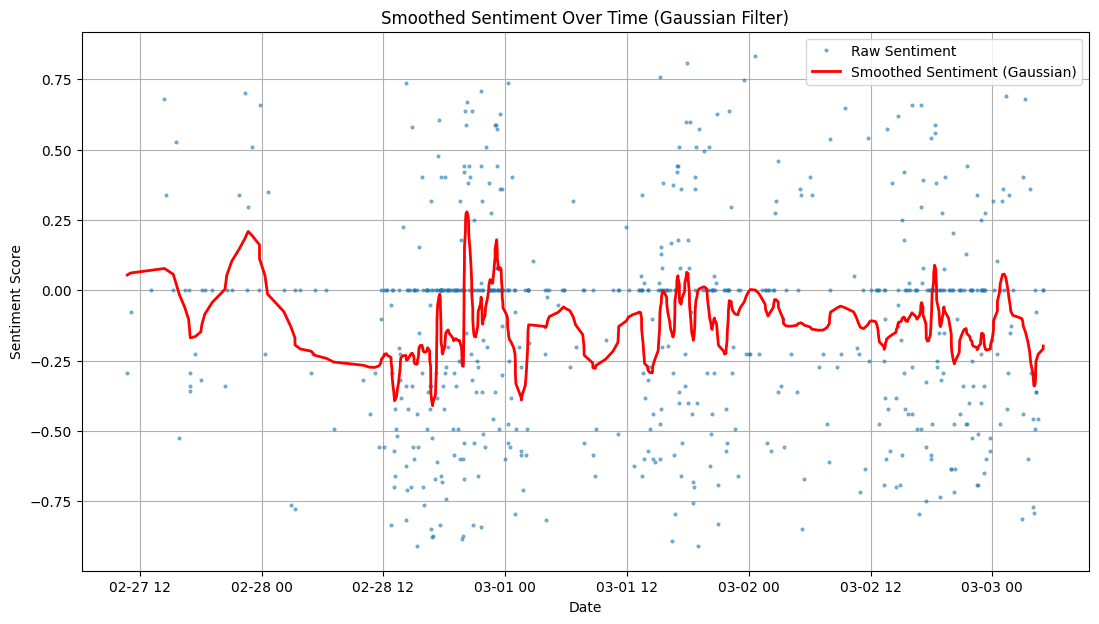

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from datetime import datetime, timedelta

# Ensure data is sorted by date
df = df.sort_values(by='date')

# Apply Gaussian smoothing
smoothed_sentiment = gaussian_filter1d(df['sentiment'], sigma=3.5)

# Plot raw and smoothed sentiment trends
plt.figure(figsize=(13, 7))
plt.plot(df['date'], df['sentiment'], linestyle='', marker='o', alpha=0.5, label="Raw Sentiment", linewidth=1.5, markersize=2)
plt.plot(df['date'], smoothed_sentiment, linestyle='-', linewidth=2, color='red', label="Smoothed Sentiment (Gaussian)")

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Smoothed Sentiment Over Time (Gaussian Filter)")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()



In [32]:
df_posts

,title,score,selftext,created,sentiment,sentiment_label,date
0,Saturday Morning Political Cartoon Thread,52,"It's Saturday, folks. Let's all kick back with...",1.740845e+09,-0.1984,neutral,2025-03-01 16:01:44
1,‘This is the point you resign’: Former U.S. Na...,18186,,1.740958e+09,0.0000,neutral,2025-03-02 23:18:51
2,"‘As far as I’m concerned, he’s an enemy to the...",12362,,1.740960e+09,-0.1779,neutral,2025-03-02 23:59:41
3,Sen. Bernie Sanders says calls for Zelenskyy t...,25084,,1.740953e+09,-0.3400,negative,2025-03-02 22:07:11
4,"‘If you just came here to yell, I can leave,’ ...",11122,,1.740955e+09,-0.5106,negative,2025-03-02 22:35:33
...,...,...,...,...,...,...,...
632,Attorney General Pam Bondi alleges FBI agents ...,38,,1.740755e+09,0.0000,neutral,2025-02-28 15:01:49
633,Elon Musk keeps tweeting the 'R-word.' Disabil...,6453,,1.740653e+09,-0.2960,neutral,2025-02-27 10:46:42
634,CFPB leaders and Musk’s DOGE planned to fire n...,38,,1.740754e+09,-0.3400,negative,2025-02-28 14:46:50
635,Iowa gives final approval to a bill removing g...,31,,1.740754e+09,0.5812,positive,2025-02-28 14:51:38
